In [1]:
import numpy as np

In [2]:
import cv2 as cv

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
img = cv.imread("image.png", 0)

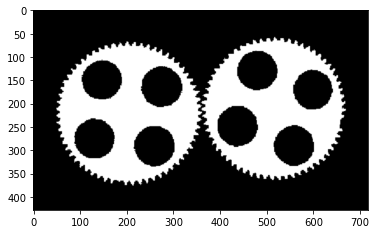

In [5]:
plt.imshow(img, 'gray')

In [6]:
print(img[200, 200])
print(img[0, 0])

255
0


In [7]:
value, img = cv.threshold(img, 100, 1, 0)

In [8]:
print(img[0, 0])
print(img[200, 200])

0
1


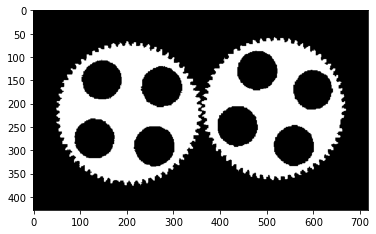

In [9]:
plt.imshow(img, 'gray')

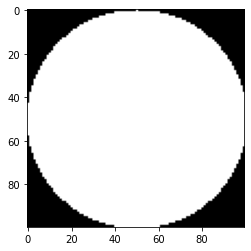

In [10]:
size = 100
width = 2
circle1 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (size, size))
plt.imshow(circle1, 'gray')

In [11]:
print(circle1[0, 0])
print(circle1[50, 50])

0
1


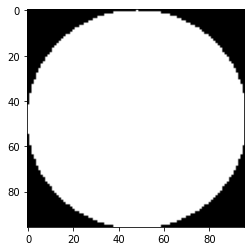

In [12]:
circle2small = cv.getStructuringElement(cv.MORPH_ELLIPSE, (size - 2 * width, size - 2 * width))
plt.imshow(circle2small, 'gray')

In [13]:
circle2 = np.zeros((size, size),np.uint8)
for i in range(size - 2 * width):
    for j in range(size - 2 * width):
        circle2[i + width, j + width] = circle2small[i, j]

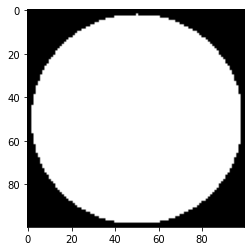

In [14]:
plt.imshow(circle2, 'gray')

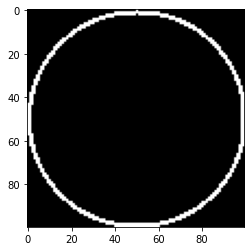

In [15]:
ring = circle1 - circle2
plt.imshow(ring, 'gray')

In [16]:
print(type(img))
print(type(ring))
print(img[200, 200])
print(ring[50, 1])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
1
1


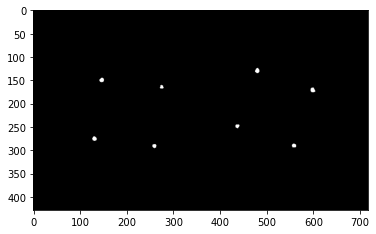

In [17]:
centers = cv.erode(img, ring)
plt.imshow(centers, 'gray')

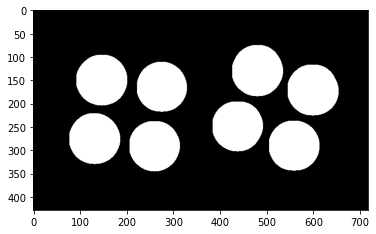

In [18]:
insertions = cv.dilate(centers, circle1)
plt.imshow(insertions, 'gray')

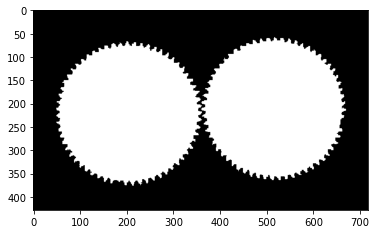

In [19]:
imgWithoutHoles = img | insertions
plt.imshow(imgWithoutHoles, 'gray')

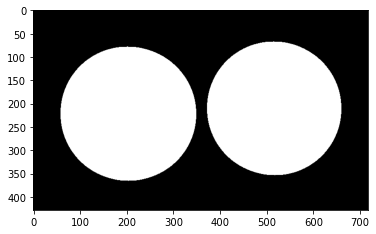

In [20]:
bodySize = 285
circle3 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (bodySize, bodySize))
openedImage = cv.morphologyEx(imgWithoutHoles, cv.MORPH_OPEN, circle3)
plt.imshow(openedImage, 'gray')

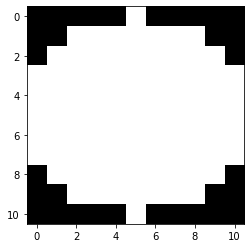

In [21]:
shiftSize = 11
circle4 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (shiftSize, shiftSize))
plt.imshow(circle4, 'gray')

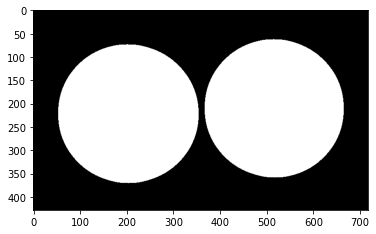

In [22]:
dilatedOpenedImage = cv.dilate(openedImage, circle4)
plt.imshow(dilatedOpenedImage, 'gray')

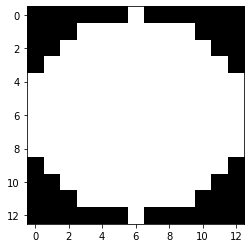

In [23]:
teethSize = 13
circle5 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (teethSize, teethSize))
plt.imshow(circle5, 'gray')

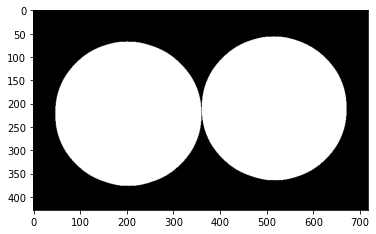

In [24]:
dilatedOpenedImage2 = cv.dilate(dilatedOpenedImage, circle5)
plt.imshow(dilatedOpenedImage2, 'gray')

In [25]:
print(dilatedOpenedImage2[200, 200])

1


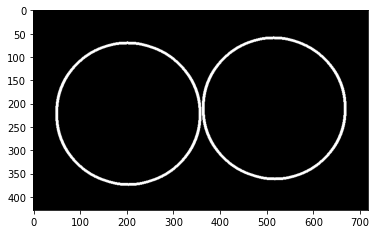

In [26]:
bigRing = cv.subtract(dilatedOpenedImage2, dilatedOpenedImage)
plt.imshow(bigRing, 'gray')

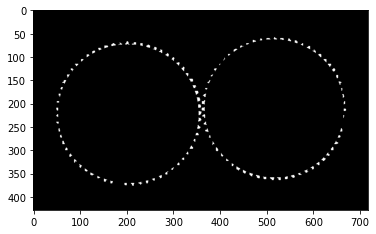

In [27]:
teeth = imgWithoutHoles & bigRing
plt.imshow(teeth, 'gray')

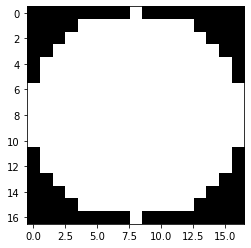

In [28]:
spacing = 17
tip_spacing = cv.getStructuringElement(cv.MORPH_ELLIPSE, (spacing, spacing))
plt.imshow(tip_spacing, 'gray')

1


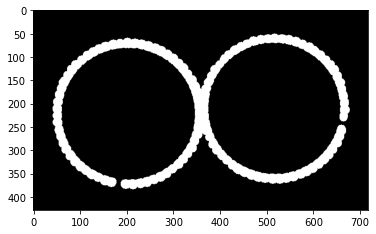

In [29]:
dilatedTeeth = cv.dilate(teeth, tip_spacing)
plt.imshow(dilatedTeeth, 'gray')
print(np.amax(dilatedTeeth))

1


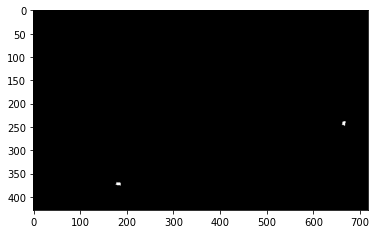

In [30]:
defects =  cv.subtract(bigRing, dilatedTeeth)
plt.imshow(defects, 'gray')
print(np.amax(defects))

1


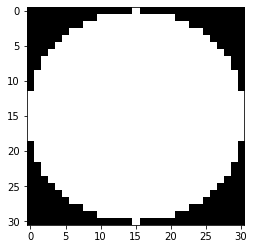

In [31]:
defectDiameter = 31
defect_cue = cv.getStructuringElement(cv.MORPH_ELLIPSE, (defectDiameter, defectDiameter))
plt.imshow(defect_cue, 'gray')
print(np.amax(defect_cue))

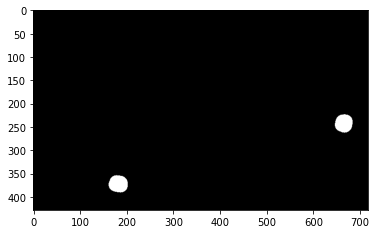

In [32]:
dilatedDefects = cv.dilate(defects, defect_cue)
plt.imshow(dilatedDefects, 'gray')

In [33]:
print(dilatedDefects[370, 170])

1


In [34]:
print(bigRing[0, 0])

0


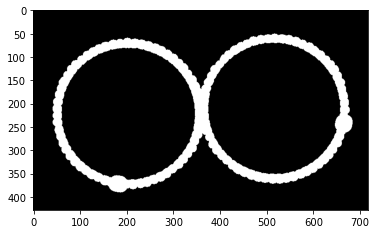

In [36]:
result = dilatedTeeth | dilatedDefects
plt.imshow(result, 'gray')